In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
# import utilities and plotting
from argparse import Namespace
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation
from IPython.display import display
# make figures higher resolution (larger)
plt.rcParams['figure.dpi'] = 150
# A decent backend for animations
plt.rcParams["animation.html"] = "jshtml"
# let 'em get big
plt.rcParams["animation.embed_limit"] = 100  # MB

# import our code that we need
import fixed_center_of_mass_exact as fcm
#import fixed_center_of_mass_exact as fsm
from davidson import solve_davidson
from constants import *
from hamiltonian import solve_BO_surfaces

# don't use too many cores
from threadpoolctl import ThreadpoolController
threadctl = ThreadpoolController()
threadctl.limit(limits=16)

In [3]:
# plot many polar slices in R (what the electron sees)
def buildAnimation(H, levels):
    fig, ax = plt.subplots(subplot_kw=dict(projection='polar'))

    ax.contour(*np.meshgrid(H.g,H.r, indexing='ij'), H.Vgrid[0,:,:].T, levels=levels)
    cs = ax.contourf(*np.meshgrid(H.g,H.r, indexing='ij'), H.Vgrid[0,:,:].T, levels=levels) # dummy contour with filled patches
    cbar = fig.colorbar(cs, orientation='horizontal', fraction=0.05)
    cs.remove()
    cbar.set_label("E / a.u.")

    # wavefunctions as many polar slices at R 
    def animate(t):
        ax.cla()
        ax.contour(*np.meshgrid(H.g,H.r, indexing='ij'), H.Vgrid[t,:,:].T, levels=levels)
        ax.text(np.pi/2,6,f"R={H.R[t]:0.03}a₀", ha='center')
    
        ax.grid(axis='x')
        locs=ax.get_xticks()
        labels = [f'{th/np.pi:.03}π' for th in locs]
        ax.set_xticks(locs, labels)
        [limit]=ax.get_yticks()[-1:]
        ax.set_yticks([limit], [f"r={limit}a₀"])
    
    return  matplotlib.animation.FuncAnimation(fig, animate, frames=args.NR)

[Build preconditioner naive] Elapsed time: 2.86us
[-0.05263117 -0.04263117 -0.03263117 -0.02263117 -0.01263117 -0.00263117
  0.00736883  0.01736883  0.02736883  0.03736883  0.04736883  0.05736883
  0.06736883  0.07736883  0.08736883  0.09736883]


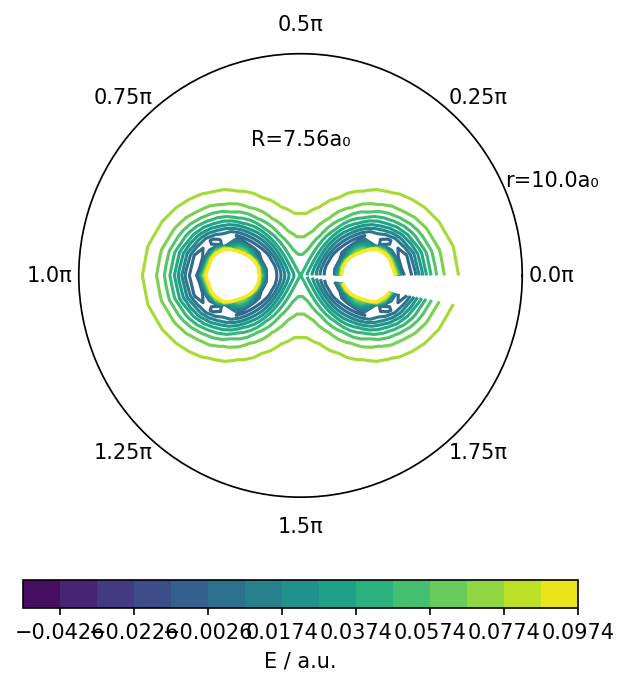

In [4]:
# set up the calculation
args = Namespace(
    M_1 = 1, M_2 = 1, J=1,
    g_1 = 1.0, g_2 = 1.0,
    NR = 31, Nr =32 , Ng = 34,
    #NR = 25, Nr = 200, Ng = 100,
    #extent = (2,4,5),   # defaults are (2,4,5), but they should be selected better (R_min, R_max, r_max)
    t = 16
)

# build the terms in the Hamiltonian
H = fcm.Hamiltonian(args)

levels = np.linspace(np.min(H.Vgrid), np.min(H.Vgrid) + 0.15, 16) # 0.15 a.u. ~4 eV range
print(levels)
display(buildAnimation(H, levels))

Building BO spectrum
Mock call to tqdm({'total': 31, 'desc': 'Building electronic surfaces'})
Mock call to tqdm({'total': 1088, 'desc': 'Building vibrational states'})


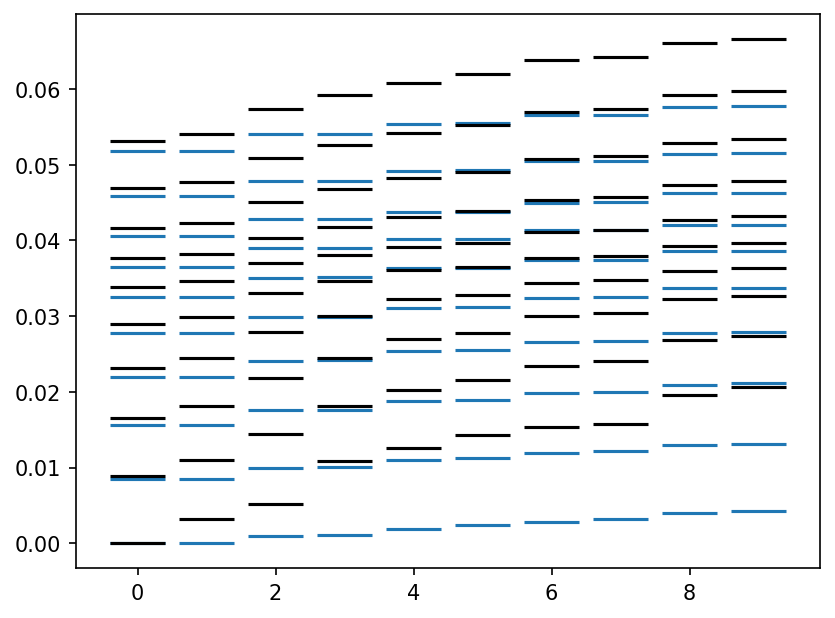

In [178]:
#B = np.load('../spec.npz')['bo_spectrum']*HARTREE_TO_EV
BO, BO_surf = H.BO_spectrum()
for n in range(10):
    plt.hlines(BO[:10,n] - BO[0,0], (n-0.4), (n+0.4))
    plt.hlines(BOorig[:10,n] - BOorig[0,0], (n-0.4), (n+0.4), 'k')

(-0.0688424070066165, 0.01)

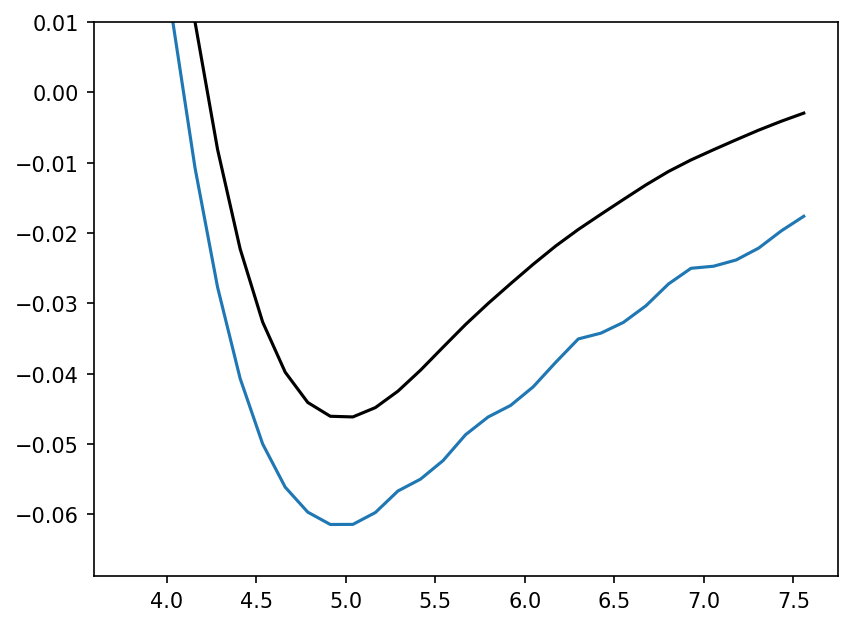

In [179]:
plt.plot(H.R, BO_surf[:,0])
plt.plot(H.R, BO_surforig[:,0],'k')
plt.ylim(top=0.01)

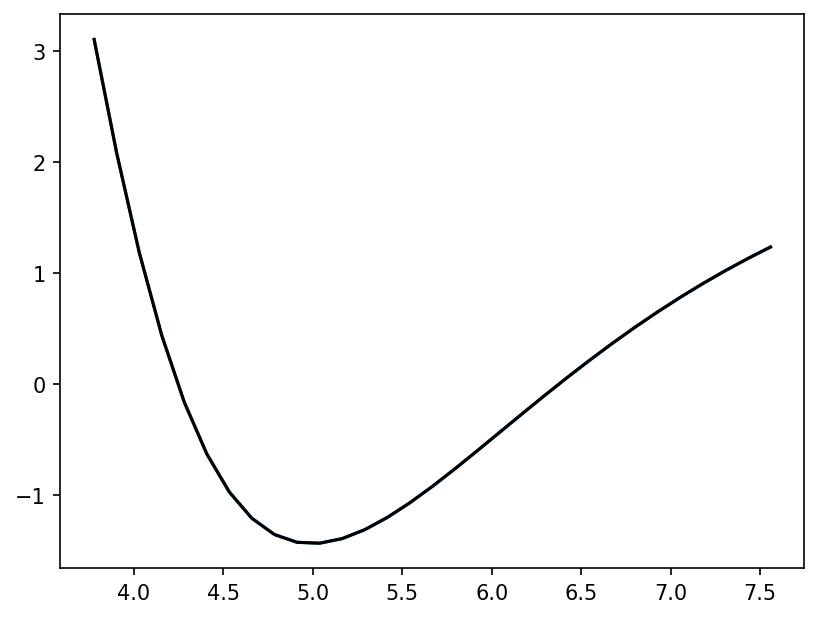

In [180]:
plt.plot(H.R,HARTREE_TO_EV*H.Vgrid[:,0,0])
plt.plot(H.R,HARTREE_TO_EV*Vorig, 'k')
#A, B, C = 2.32e5, 3.15, 2.31e4
#R = np.copy(H.R)
#R = np.linspace(2.5,4,100)
#V = HARTREE_TO_EV*KCALMOLE_TO_HARTREE*H.g_1*H.g_2*(
#    A*np.exp(-B*R/H.aa)
#    -C/(R/H.aa)**6
#)
#plt.plot(R, V)


In [48]:
idx=np.argmin(H.Vgrid[:,0,0])
np.gradient(np.gradient(H.Vgrid[:,0,0], H.R), H.R)[idx]

np.float64(-0.20469124309652975)

In [89]:
Vorig=np.copy(H.Vgrid[:,0,0])
BOorig = np.copy(BO)
BO_surforig = np.copy(BO_surf)

In [6]:
H @ np.random.random(H.size)

Array([ 0.10285287-1.00111030e-04j, -0.19113417+1.38513414e-04j,
        0.36584465+1.28918934e-04j, ...,  0.04568863-2.93963324e-06j,
        0.02665305+3.29382233e-05j,  0.09507038-1.51868092e-05j],      dtype=complex128)